In [1]:
from utils import *
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
np.random.seed(1)

In [2]:
# Taken from Duraiswami et al 2014
duraiswami_data = [0.3636363636, 0.8571428571, 1.083333333, 0.6356589147, 0.7741935484, 0.5, 0.4583333333]

# Taken from Aubele et al 1988
aubele_data = [1.142857143, 1.346153846, 1,  0.5217391304, 1.076923077, 0.7777777778, 0.5, 0.5, 1.055555556, 0.6363636364, 0.6, 1.8, 0.4736842105, 0.1612903226, 0.2272727273, 1.294117647, 0.4, 2.12, 0.4347826087, 2.222222222, 0.4285714286, 1, 0.8, 0.5, 0.875, 1.071428571, 1.176470588, 0.8947368421, 0.8461538462]

# cache J matrices 
cache = {}

In [3]:
RHO1_MIN = .95
RHO1_MAX = .9999

# m/s
U0_MIN = 1
U0_MAX = 10

MU1_MIN = 1.0001
MU1_MAX = 10

GRANULARITY = 1000
N_SAMPLES = int(1e4)

params = {}
params["dP"] = 0
params["g"] = 9.8
params["U0"] = 5
params["rho2"] = 1
params["d1"] = 1
params["mu2"] = 1
params["verbose"] = False
params["flow_height"] = 4

mu1_vals = np.linspace(MU1_MIN, MU1_MAX, GRANULARITY)
mu1s =  np.random.choice(mu1_vals, size=N_SAMPLES)

# These ranges should correspond with the ranges of the stacked phase diagram
small_d2s = np.random.choice(np.linspace(.2, 1, GRANULARITY), size=N_SAMPLES // 2)
large_d2s = np.random.choice(np.linspace(1, 5, GRANULARITY), size=N_SAMPLES // 2)

U0s = np.random.choice(np.linspace(U0_MIN, U0_MAX, GRANULARITY), size = N_SAMPLES)

d2s = np.concatenate([small_d2s, large_d2s])
np.random.shuffle(d2s)

rho1s = np.random.choice(np.linspace(RHO1_MIN, RHO1_MAX, GRANULARITY), size=N_SAMPLES)

stable_d2s = []
unstable_d2s = []
stable_froudes = []
unstable_froudes = []

for mu1, d2, rho1, U0 in zip(mu1s, d2s, rho1s, U0s):

    params["mu1"] = mu1
    params["d2"] = d2
    params["rho1"] = rho1
    params["U0"] = U0

    J, F2 = yihJ(**params)

    if J <= 0:
        stable_d2s.append(d2)
        stable_froudes.append(F2)
    else:
        unstable_d2s.append(d2)
        unstable_froudes.append(F2)
            
box_data = (duraiswami_data, aubele_data, stable_d2s, unstable_d2s)

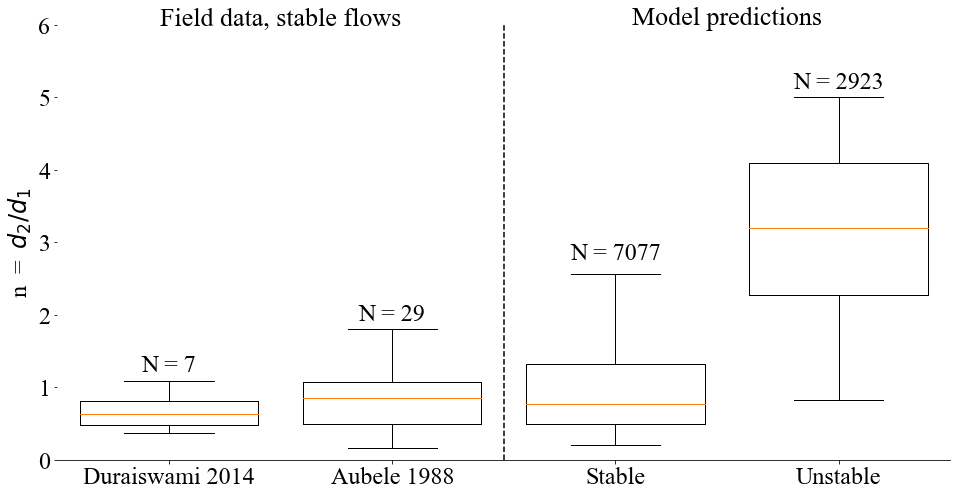

In [4]:
fig, ax = plt.subplots(figsize=(16,8))
F_SIZE = 24
labels=["Duraiswami 2014", "Aubele 1988", "Stable", "Unstable"]
ax.boxplot(box_data, labels=labels, showfliers=False, widths=.8)

ax.axvline(2.5, color='black', linestyle='--')
ax.set_ylabel("n  =  $d_2 / d_1$")
ax.set_ylim(bottom=0)
ax.set_ylim(top=6)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.text(3, 2.85, f"N = {len(stable_d2s)}", fontsize=F_SIZE, horizontalalignment="center", verticalalignment="center")
plt.text(4, 5.2, f"N = {len(unstable_d2s)}", fontsize=F_SIZE, horizontalalignment="center", verticalalignment="center")

plt.text(1, 1.3, "N = 7", fontsize=F_SIZE, horizontalalignment="center", verticalalignment="center")
plt.text(2, 2, "N = 29", fontsize=F_SIZE, horizontalalignment="center", verticalalignment="center")

F_SIZE = 26

plt.text(1.5, 6, "Field data, stable flows", fontsize=F_SIZE, horizontalalignment="center")
plt.text(3.5, 6, "Model predictions", fontsize=F_SIZE, horizontalalignment="center")

VERBOSE = False
if VERBOSE:
    for idx, val in enumerate(box_data):
        print(labels[idx])
        print(len(box_data[idx]))
        print("mean", np.mean(box_data[idx]))
        print("med", np.median(box_data[idx]))
        print("std", np.std(box_data[idx]))
        print("var", np.var(box_data[idx]))
        print()


#fig.savefig(f"box_plots/single_r_w_labels_vel_and_height")

In [5]:
print(f"Value range stable froude: {np.sqrt(min(stable_froudes))} - {np.sqrt(max(stable_froudes))}")
print(f"Value range unstable froude: {np.sqrt(min(unstable_froudes))} - {np.sqrt(max(unstable_froudes))}")

Value range stable froude: 0.09846109655515303 - 1.1425611523679648
Value range unstable froude: 0.07317121980535166 - 0.5161916897701713


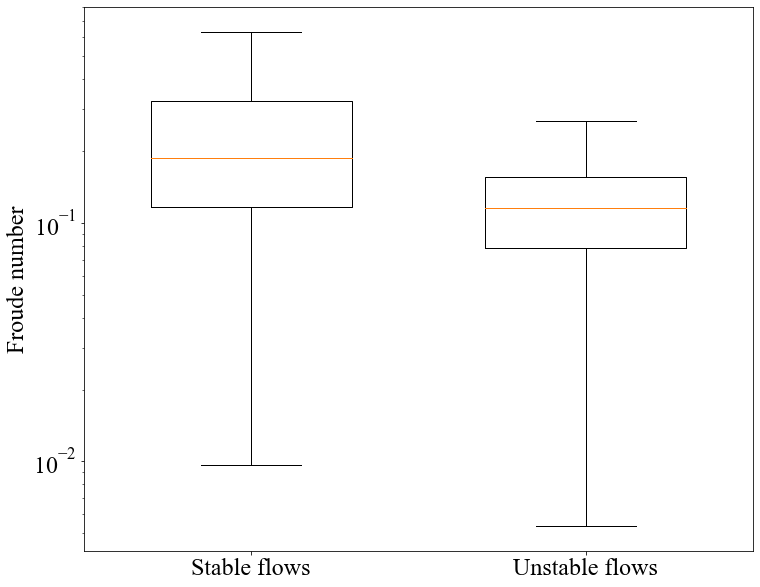

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
labels = ["Stable flows", "Unstable flows"]
ax.boxplot([stable_froudes, unstable_froudes], showfliers=False, labels=labels, widths=.6)
ax.set_yscale("log")
ax.set_ylabel("Froude number")
fig.savefig("box_plots/froude_distribution")